## Лабораторная работа № 1
## Выполнила: Ерыгина Виктория гр. 932001
### Нечетный вариант

In [4]:
!pip install pandas
!pip install seaborn
!pip install keras
!pip install tensorflow

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder
from keras.callbacks import ModelCheckpoint,EarlyStopping

### 1. Оценка вероятности диагностики диабета у человека.

Построим бинарный классификатор.

In [98]:
data = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')

In [99]:
data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [100]:
data.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [101]:
data.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [103]:
data.isna().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

#### Пропущенных данных нет ни в одном из признаков.

In [104]:
data['Diabetes_012'].unique()

array([0., 2., 1.])

In [105]:
data['Diabetes_012'].value_counts()

0.0    213703
2.0     35346
1.0      4631
Name: Diabetes_012, dtype: int64

<b>Создадим новый столбец, в котором будет выводится "negative" и "positive" в зависимости от значения, лежащего в столбце "Diabetes_012".</b>

In [106]:
diabet_result_dictionary = {0:'negative',1:'positive',2:'positive'}
data['Diabet Result'] = data['Diabetes_012'].map(diabet_result_dictionary)

In [107]:
data[['Diabet Result','Diabetes_012']].head(15)

,Diabet Result,Diabetes_012
0,negative,0.0
1,negative,0.0
2,negative,0.0
3,negative,0.0
4,negative,0.0
5,negative,0.0
6,negative,0.0
7,negative,0.0
8,positive,2.0
9,negative,0.0


In [108]:
diabet_result_binary = {'negative':0,'positive':1}
data['Target Binary'] = data['Diabet Result'].map(diabet_result_binary)

In [109]:
data[['Diabet Result','Target Binary']].head(15)

,Diabet Result,Target Binary
0,negative,0
1,negative,0
2,negative,0
3,negative,0
4,negative,0
5,negative,0
6,negative,0
7,negative,0
8,positive,1
9,negative,0


In [110]:
X = data.drop(['Diabet Result','Target Binary'],axis=1)
y = data['Target Binary']

<b>Инструмент для масштабирования MinMaxScaler(), который мы используем для дальнейшего обучения нейронной сети. Все значения буду находиться в диапазоне от 0 до 1.</b>

In [111]:
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)

### Обучающая, тестовая и валидационная выборки.

<b>Весь набор разбивается на 2 части, где 80% идут на обучающую, 20% на тестовую.</b>

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=1)
print(f'Train: {X_train.shape}, Test: {X_test.shape}')

Train: (202944, 22), Test: (50736, 22)


<b>Повторно делим X_train. Теперь 20% у нас будут использоваться для валидационного набора, 80% для обучения.</b>

In [113]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2,random_state=1)
print(f'Train: {X_train.shape}, Validation: {X_val.shape}')

Train: (162355, 22), Validation: (40589, 22)


### Построение нейросети

### 1 вариант

In [78]:
binary_class1 = Sequential()
binary_class1.add(Dense(16, activation='relu', input_dim=X_train.shape[1]))
binary_class1.add(Dense(1, activation='sigmoid'))

In [79]:
binary_class1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 16)                368       
                                                                 
 dense_20 (Dense)            (None, 1)                 17        
                                                                 
Total params: 385 (1.50 KB)
Trainable params: 385 (1.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


<b>Получаем количество просуммированных весов 385, которые мы должны настроить.</b>

In [80]:
binary_class1.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')

In [81]:
binary_class_history1 = binary_class1.fit(X_train, y_train, epochs=50, batch_size=256,validation_data=(X_val, y_val))

Epoch 1/50
635/635 [==============================] - 1s 1ms/step - loss: 0.2141 - accuracy: 0.9224 - val_loss: 0.0642 - val_accuracy: 0.9844
Epoch 2/50
635/635 [==============================] - 1s 1ms/step - loss: 0.0338 - accuracy: 0.9907 - val_loss: 0.0202 - val_accuracy: 0.9929
Epoch 3/50
635/635 [==============================] - 1s 1ms/step - loss: 0.0127 - accuracy: 0.9987 - val_loss: 0.0086 - val_accuracy: 1.0000
Epoch 4/50
635/635 [==============================] - 1s 1ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 0.0041 - val_accuracy: 1.0000
Epoch 5/50
635/635 [==============================] - 1s 1ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 6/50
635/635 [==============================] - 1s 1ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 7/50
635/635 [==============================] - 1s 1ms/step - loss: 8.8839e-04 - accuracy: 1.0000 - val_loss: 7.1965e-04 - val_accuracy: 1.000

epochs - Количество эпох (итераций)

batch_size - Размер пакета

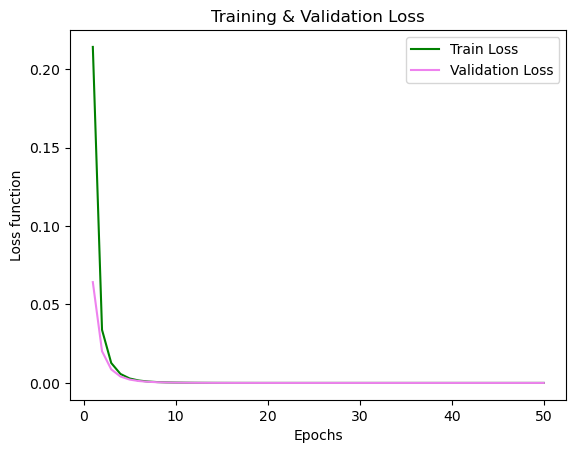

In [82]:
loss_fun = binary_class_history1.history['loss']
val_loss_fun = binary_class_history1.history['val_loss']
epochs = range(1,len(loss_fun)+1)

plt.plot(epochs, loss_fun, label='Train Loss', color='green')
plt.plot(epochs,val_loss_fun, label='Validation Loss', color='violet')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss function')
plt.legend()
plt.show()

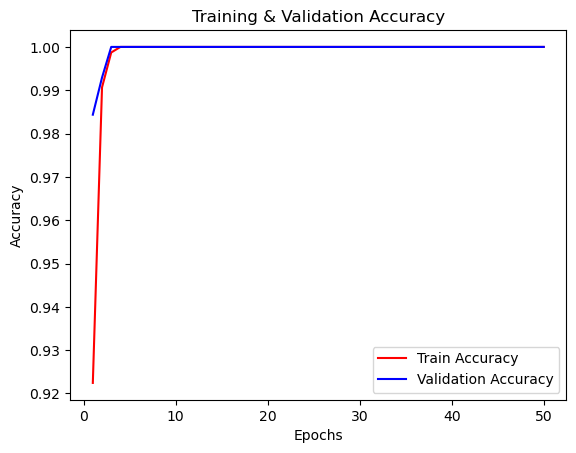

In [83]:
accuracy = binary_class_history1.history['accuracy']
val_accuracy = binary_class_history1.history['val_accuracy']
epochs = range(1,len(accuracy)+1)

plt.title('Training & Validation Accuracy')
plt.plot(epochs, accuracy, label='Train Accuracy', color ='red')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Recall, Precision, Weighted Accuracy, AUC

In [84]:
binary_class1.fit(X_train, y_train)
y_prob = binary_class1.predict(X_test)
y_pred = (y_prob > 0.5).astype(int)

recall  = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
weighted_acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

print(f'Recall: {recall:}')
print(f'Precision: {precision}')
print(f'Weighted accuracy: {weighted_acc}')
print(f'AUC: {auc}')

1586/1586 [==============================] - 1s 657us/step
Recall: 1.0
Precision: 1.0
Weighted accuracy: 1.0
AUC: 1.0


### 2 вариант

In [114]:
binary_class = Sequential()
binary_class.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
binary_class.add(Dense(16, activation='relu'))
binary_class.add(Dense(1, activation='sigmoid'))

In [115]:
binary_class.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 64)                1472      
                                                                 
 dense_28 (Dense)            (None, 16)                1040      
                                                                 
 dense_29 (Dense)            (None, 1)                 17        
                                                                 
Total params: 2529 (9.88 KB)
Trainable params: 2529 (9.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [116]:
binary_class.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')

In [117]:
binary_class_history = binary_class.fit(X_train, y_train, batch_size=512,validation_data=(X_val,y_val), callbacks=callbacks_list, epochs=100)

Epoch 1/100
303/318 [===========================>..] - ETA: 0s - loss: 0.1518 - accuracy: 0.9422
Epoch 1: val_accuracy did not improve from 1.00000
318/318 [==============================] - 1s 1ms/step - loss: 0.1457 - accuracy: 0.9448 - val_loss: 0.0137 - val_accuracy: 0.9996
Epoch 2/100
305/318 [===========================>..] - ETA: 0s - loss: 0.0053 - accuracy: 0.9999
Epoch 2: val_accuracy did not improve from 1.00000
318/318 [==============================] - 0s 1ms/step - loss: 0.0051 - accuracy: 0.9999 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 3/100
303/318 [===========================>..] - ETA: 0s - loss: 8.2400e-04 - accuracy: 1.0000
Epoch 3: val_accuracy did not improve from 1.00000
318/318 [==============================] - 0s 1ms/step - loss: 8.0616e-04 - accuracy: 1.0000 - val_loss: 4.2810e-04 - val_accuracy: 1.0000
Epoch 4/100
310/318 [============================>.] - ETA: 0s - loss: 2.6387e-04 - accuracy: 1.0000
Epoch 4: val_accuracy did not improve from 1.00000

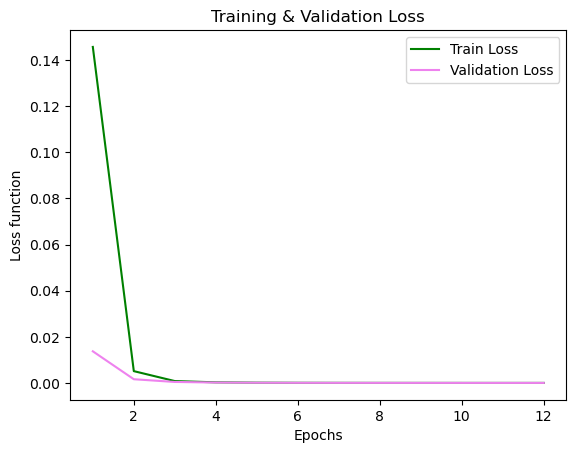

In [118]:
loss_fun = binary_class_history.history['loss']
val_loss_fun = binary_class_history.history['val_loss']
epochs = range(1,len(loss_fun)+1)

plt.plot(epochs, loss_fun, label='Train Loss', color='green')
plt.plot(epochs,val_loss_fun, label='Validation Loss', color='violet')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss function')
plt.legend()
plt.show()

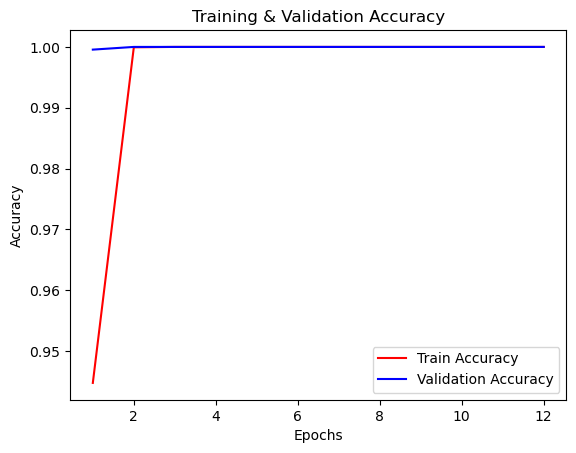

In [119]:
plt.clf()
accuracy = binary_class_history.history['accuracy']
val_accuracy = binary_class_history.history['val_accuracy']
epochs = range(1,len(accuracy)+1)

plt.title('Training & Validation Accuracy')
plt.plot(epochs, accuracy, label='Train Accuracy', color ='red')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Recall, Precision, Weighted Accuracy, AUC

In [120]:
y_prob = binary_class.predict(X_test)
y_pred = (y_prob > 0.5).astype(int).flatten()

recall  = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
weighted_acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

print(f'Recall: {recall:}')
print(f'Precision: {precision}')
print(f'Weighted accuracy: {weighted_acc}')
print(f'AUC: {auc}')

1586/1586 [==============================] - 1s 658us/step
Recall: 1.0
Precision: 1.0
Weighted accuracy: 1.0
AUC: 1.0


## 2. Оценка уровня физического развития людей разного возраста

Построим многоклассовый классификатор.

In [9]:
data = pd.read_csv('bodyPerformance.csv')
data.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [10]:
data.describe()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
count,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000
mean,36.775106,168.559807,67.447316,23.240165,78.796842,130.234817,36.963877,15.209268,39.771224,190.129627
std,13.625639,8.426583,11.949666,7.256844,10.742033,14.713954,10.624864,8.456677,14.276698,39.868000
min,21.000000,125.000000,26.300000,3.000000,0.000000,0.000000,0.000000,-25.000000,0.000000,0.000000
25%,25.000000,162.400000,58.200000,18.000000,71.000000,120.000000,27.500000,10.900000,30.000000,162.000000
50%,32.000000,169.200000,67.400000,22.800000,79.000000,130.000000,37.900000,16.200000,41.000000,193.000000
75%,48.000000,174.800000,75.300000,28.000000,86.000000,141.000000,45.200000,20.700000,50.000000,221.000000
max,64.000000,193.800000,138.100000,78.400000,156.200000,201.000000,70.500000,213.000000,80.000000,303.000000


In [11]:
data.columns

Index(['age', 'gender', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic',
       'systolic', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts',
       'broad jump_cm', 'class'],
      dtype='object')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


In [13]:
data.isna().sum()

age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64

#### Пропущенных данных нет ни в одном из признаков.

In [15]:
data_duplicate = data[data.duplicated()]
print("Duplicate Rows : ",len(data_duplicate))
data_duplicate

Duplicate Rows :  1


,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
12473,27.0,F,157.0,49.1,30.7,70.0,86.0,27.7,19.7,51.0,167.0,A


In [16]:
data.drop_duplicates(inplace = True)

In [17]:
data_duplicate = data[data.duplicated()]
print("Duplicate Rows : ",len(data_duplicate))
data_duplicate

Duplicate Rows :  0


,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class


In [161]:
data['class'].unique()

array(['C', 'A', 'B', 'D'], dtype=object)

In [162]:
data['class'].value_counts()

C    3349
D    3349
A    3348
B    3347
Name: class, dtype: int64

In [18]:
data['gender'].unique()

array(['M', 'F'], dtype=object)

In [19]:
data['gender'].value_counts()

M    8467
F    4925
Name: gender, dtype: int64

In [20]:
dictionary_class = {'A':0,'B':1,'C':2,'D':3}
dictionary_gender = {'F':0, 'M':1}
data['Target Multi'] = data['class'].map(dictionary_class)
data['gender_num'] = data['gender'].map(dictionary_gender)

In [21]:
data[['class', 'Target Multi', 'gender', 'gender_num']].head(7)

,class,Target Multi,gender,gender_num
0,C,2,M,1
1,A,0,M,1
2,C,2,M,1
3,B,1,M,1
4,B,1,M,1
5,B,1,F,0
6,D,3,F,0


In [165]:
X = data.drop(['gender','class','Target Multi'],axis=1)
y = data['Target Multi']

In [166]:
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)

### Обучающая, тестовая и валидационная выборки.

### 1 вариант

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=1)
print(f'Train: {X_train.shape}, Test: {X_test.shape}')

Train: (10714, 10), Test: (2679, 10)


In [168]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2,random_state=1)
print(f'Train: {X_train.shape}, Validation: {X_val.shape}')

Train: (8571, 10), Validation: (2143, 10)


In [169]:
y_train

13187    1
9586     1
2820     3
3404     1
3074     0
        ..
8098     0
1797     0
3119     2
10632    0
3446     1
Name: Target Multi, Length: 8571, dtype: int64

In [170]:
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [171]:
y_train

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]], dtype=float32)

In [141]:
multi_class = Sequential()
multi_class.add(Dense(16, activation='relu',input_dim=X.shape[1]))
multi_class.add(Dense(4,activation='softmax'))

In [142]:
multi_class.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')

In [143]:
multi_class_history = multi_class.fit(X_train, y_train, batch_size=10, validation_data=(X_val,y_val), epochs=50)

Epoch 1/50
858/858 [==============================] - 1s 989us/step - loss: 1.3385 - accuracy: 0.3503 - val_loss: 1.2860 - val_accuracy: 0.4111
Epoch 2/50
858/858 [==============================] - 1s 945us/step - loss: 1.2296 - accuracy: 0.4396 - val_loss: 1.1780 - val_accuracy: 0.4676
Epoch 3/50
858/858 [==============================] - 1s 953us/step - loss: 1.1367 - accuracy: 0.4859 - val_loss: 1.1020 - val_accuracy: 0.5016
Epoch 4/50
858/858 [==============================] - 1s 972us/step - loss: 1.0806 - accuracy: 0.5068 - val_loss: 1.0617 - val_accuracy: 0.5371
Epoch 5/50
858/858 [==============================] - 1s 958us/step - loss: 1.0488 - accuracy: 0.5216 - val_loss: 1.0349 - val_accuracy: 0.5334
Epoch 6/50
858/858 [==============================] - 1s 965us/step - loss: 1.0273 - accuracy: 0.5297 - val_loss: 1.0186 - val_accuracy: 0.5408
Epoch 7/50
858/858 [==============================] - 1s 974us/step - loss: 1.0121 - accuracy: 0.5401 - val_loss: 1.0106 - val_accuracy:

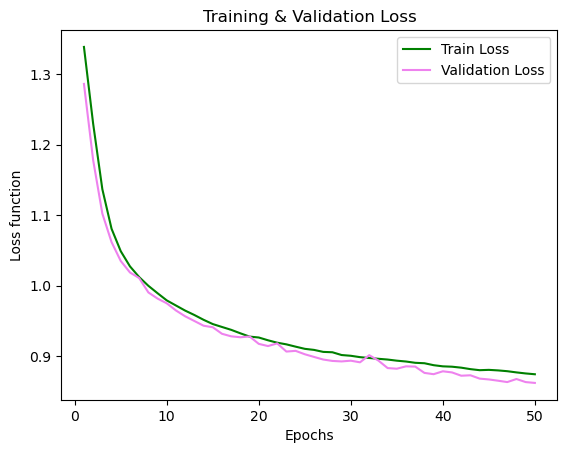

In [144]:
loss_fun = multi_class_history.history['loss']
val_loss_fun = multi_class_history.history['val_loss']
epochs = range(1,len(loss_fun)+1)

plt.plot(epochs, loss_fun, label='Train Loss', color='green')
plt.plot(epochs,val_loss_fun, label='Validation Loss', color='violet')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss function')
plt.legend()
plt.show()

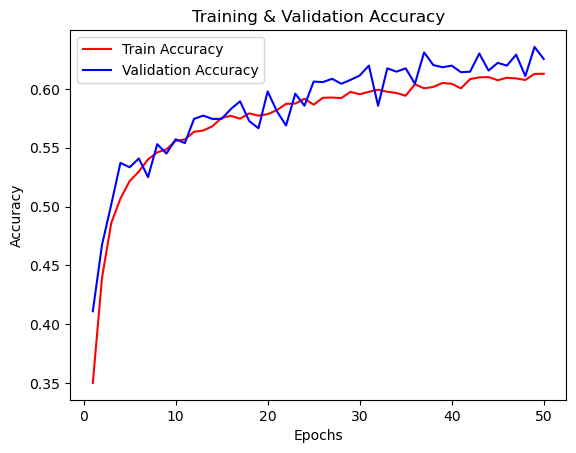

In [145]:
accuracy = multi_class_history.history['accuracy']
val_accuracy = multi_class_history.history['val_accuracy']
epochs = range(1,len(accuracy)+1)

plt.title('Training & Validation Accuracy')
plt.plot(epochs, accuracy, label='Train Accuracy', color ='red')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Тестовый пример:

In [146]:
print(y_test[1])

[0. 0. 1. 0.]


In [147]:
x_test = X_test[4,:]
original_feat = min_max_scaler.inverse_transform(x_test.reshape(1,-1))
print(original_feat)
y_pred = multi_class.predict(x_test.reshape(1,-1))
print(y_pred[0])

[[ 60.  152.4  53.6  34.3  65.  106.   25.4  21.9  14.  125. ]]
1/1 [==============================] - 0s 28ms/step
[0.12705146 0.40391326 0.34740505 0.12163017]


### Recall, Precision, Weighted Accuracy, AUC для всех классов всех исследованных моделей. Вывести ROC-кривые для каждого класса в лучшем классификаторе

In [148]:
y_prob = multi_class.predict(X_test)
y_pred = (y_prob > 0.5).astype(int)

recall_1  = recall_score(y_test, y_pred, average='weighted')
precision_1 = precision_score(y_test, y_pred, average='weighted')
weighted_acc_1 = accuracy_score(y_test, y_pred)


print(f'Recall: {recall_1:}')
print(f'Precision: {precision_1}')
print(f'Weighted accuracy: {weighted_acc_1}')


84/84 [==============================] - 0s 663us/step
Recall: 0.42889137737961924
Precision: 0.5424598839852228
Weighted accuracy: 0.42889137737961924


D:\FILES\Program Files\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [149]:
label_bin = LabelBinarizer().fit(y_train)
y_one_test = label_bin.transform(y_test)
print(y_one_test.shape)

(2679, 4)


84/84 [==============================] - 0s 669us/step


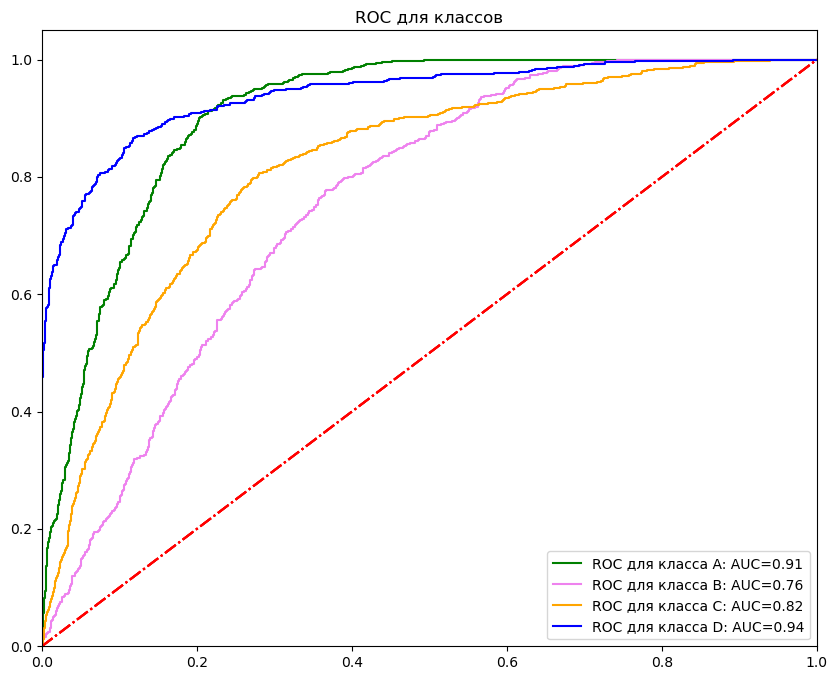

In [150]:
from sklearn.metrics import roc_curve, auc
number_of_classes = {0:'A',1:'B',2:'C',3:'D'}
y_prob = multi_class.predict(X_test)
classes = y_test.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:,i],y_prob[:,i])
    roc_auc[i] = auc(fpr[i],tpr[i])
    
plt.figure(figsize=(10,8))
colors = ['green', 'violet', 'orange', 'blue']
for i, color in zip(range(classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, label="ROC для класса {0}: AUC={1:0.2f}".format(number_of_classes[i], roc_auc[i]))

    plt.plot([0,1],[0,1],'-.', color='r')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0,1.05])
    plt.title('ROC для классов')
    plt.legend()

### 2 вариант

In [172]:
multi_class = Sequential()
multi_class.add(Dense(32, activation='relu',input_dim=X.shape[1]))
multi_class.add(Dense(16,activation='selu'))
multi_class.add(Dense(4,activation='softmax'))

multi_class.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')

In [173]:
multi_class_history = multi_class.fit(X_train, y_train, batch_size=64, validation_data=(X_val,y_val), epochs=70)

Epoch 1/70
134/134 [==============================] - 0s 2ms/step - loss: 1.3695 - accuracy: 0.2903 - val_loss: 1.3502 - val_accuracy: 0.3425
Epoch 2/70
134/134 [==============================] - 0s 1ms/step - loss: 1.3005 - accuracy: 0.3867 - val_loss: 1.2452 - val_accuracy: 0.4176
Epoch 3/70
134/134 [==============================] - 0s 1ms/step - loss: 1.1745 - accuracy: 0.4662 - val_loss: 1.1229 - val_accuracy: 0.5119
Epoch 4/70
134/134 [==============================] - 0s 1ms/step - loss: 1.0807 - accuracy: 0.5080 - val_loss: 1.0539 - val_accuracy: 0.5362
Epoch 5/70
134/134 [==============================] - 0s 1ms/step - loss: 1.0334 - accuracy: 0.5298 - val_loss: 1.0149 - val_accuracy: 0.5422
Epoch 6/70
134/134 [==============================] - 0s 1ms/step - loss: 1.0018 - accuracy: 0.5439 - val_loss: 0.9897 - val_accuracy: 0.5604
Epoch 7/70
134/134 [==============================] - 0s 1ms/step - loss: 0.9812 - accuracy: 0.5486 - val_loss: 0.9662 - val_accuracy: 0.5698
Epoch 

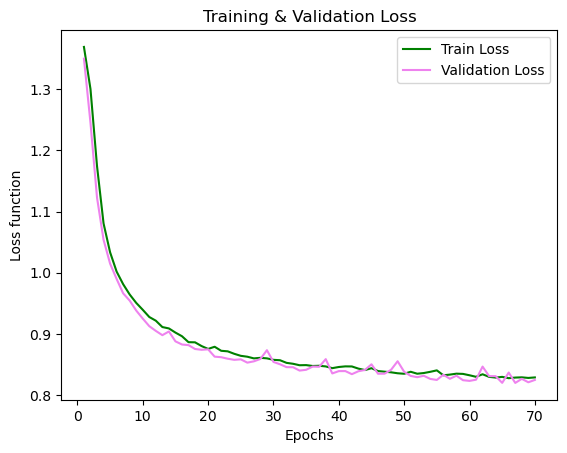

In [174]:
loss_fun = multi_class_history.history['loss']
val_loss_fun = multi_class_history.history['val_loss']
epochs = range(1,len(loss_fun)+1)

plt.plot(epochs, loss_fun, label='Train Loss', color='green')
plt.plot(epochs,val_loss_fun, label='Validation Loss', color='violet')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss function')
plt.legend()
plt.show()

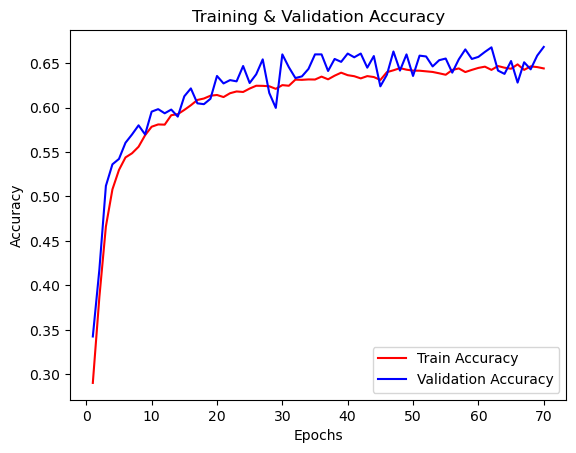

In [175]:
accuracy = multi_class_history.history['accuracy']
val_accuracy = multi_class_history.history['val_accuracy']
epochs = range(1,len(accuracy)+1)

plt.title('Training & Validation Accuracy')
plt.plot(epochs, accuracy, label='Train Accuracy', color ='red')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Recall, Precision, Weighted Accuracy, AUC для всех классов всех исследованных моделей. Вывести ROC-кривые для каждого класса в лучшем классификаторе

In [177]:
y_prob = multi_class.predict(X_test)
y_pred = (y_prob > 0.5).astype(int)

recall_2  = recall_score(y_test, y_pred, average='weighted')
precision_2 = precision_score(y_test, y_pred, average='weighted')
weighted_acc_2 = accuracy_score(y_test, y_pred)


print(f'Recall: {recall_2:}')
print(f'Precision: {precision_2}')
print(f'Weighted accuracy: {weighted_acc_2}')

84/84 [==============================] - 0s 687us/step
Recall: 0.46808510638297873
Precision: 0.6952507732074469
Weighted accuracy: 0.46808510638297873


In [169]:
label_bin = LabelBinarizer().fit(y_train)
y_one_test = label_bin.transform(y_test)
print(y_one_test.shape)

(2679, 4)


84/84 [==============================] - 0s 675us/step


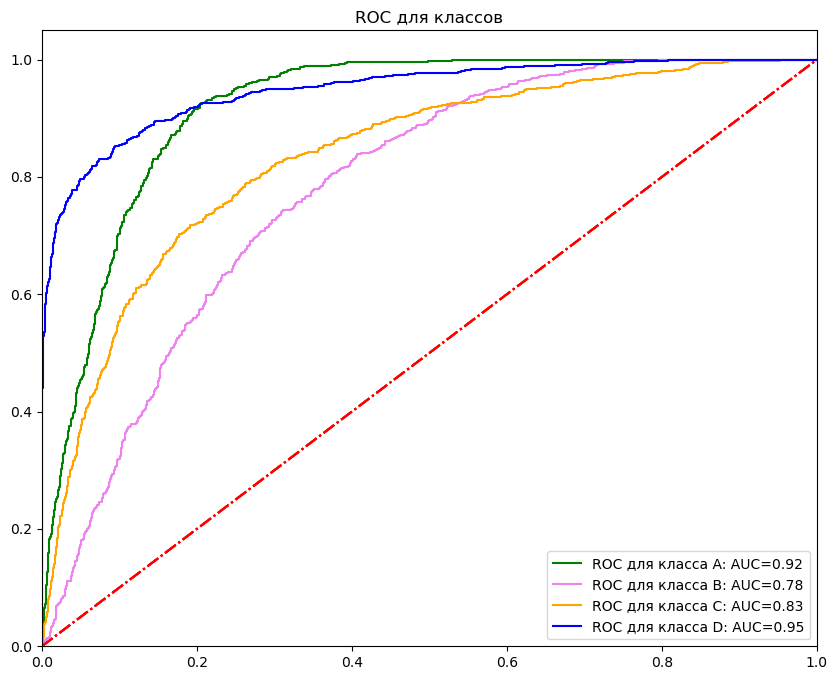

In [170]:
from sklearn.metrics import roc_curve, auc
number_of_classes = {0:'A',1:'B',2:'C',3:'D'}
y_prob = multi_class.predict(X_test)
classes = y_test.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:,i],y_prob[:,i])
    roc_auc[i] = auc(fpr[i],tpr[i])
    
plt.figure(figsize=(10,8))
colors = ['green', 'violet', 'orange', 'blue']
for i, color in zip(range(classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, label="ROC для класса {0}: AUC={1:0.2f}".format(number_of_classes[i], roc_auc[i]))

    plt.plot([0,1],[0,1],'-.', color='r')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0,1.05])
    plt.title('ROC для классов')
    plt.legend()

### Вывод

Чем больше изгиб кривой, тем лучше модель классифицирует данные по категориям. Чем ближе AUC находится к 1, тем лучше модель. Заметим, что во втором варианте класс D имеет самую высокую AUC, следовательно, это лучшая модель для классификации данных по категориям.

In [179]:
results = pd.DataFrame({'Metric': ['Recall', 'Precision', 'Weighted Accuracy'],
                        '1 вариант': [recall_1, precision_1, weighted_acc_1],
                        '2 вариант': [recall_2, precision_2, weighted_acc_2]})

print(results)

              Metric  1 вариант  2 вариант
0             Recall   0.428891   0.468085
1          Precision   0.542460   0.695251
2  Weighted Accuracy   0.428891   0.468085


По метрике <b>Recall</b> 2 вариант превосходит, следовательно, вторая модель способна лучше обнаруживать положительные (истинные) примеры в данных. 

Так как <b>Precision</b> второй модель больше, то она имеет более высокую точность.

### 3. Оценка расходов домохозяйства на один из видов потребляемых ресурсов

Построим регрессор.

In [24]:
data = pd.read_csv('DS_2019_publi.csv')
data.head()

,Climate_Region_Pub,DIVISION,REPORTABLE_DOMAIN,DOLELCOL,TOTALDOLCOL,KWHCOL,BTUELCOL,TOTALBTUCOL,TOTALDOLSPH,TOTALBTUSPH,CELLAR,NWEIGHT,TOTHSQFT,HEATHOME,NUMPC,DOLLAREL,DOLELOTH,CUFEETNGSPH,BTUNGSPH,DOLNGSPH,TEMPHOME,TOTCSQFT,BTUFOSPH,AIRCOND,ELCOOL,GALLONFOSPH,WALLTYPE,TOTALDOLOTH,BTUFO,GALLONFO,DOLFOSPH,DOLLARFO,KWHSPH,BTUELSPH,FOWARM,USEFO,TOTUSQFT,TOTALDOL,NUMTHERM,DOLELSPH,CONCRETE,CUFEETNG,BTUNG,GALLONFOOTH,BTUFOOTH,BEDROOMS,FOWATER,GALLONFOWTH,BTUFOWTH,DOLFOWTH,GALLONKEROTH,BTUKEROTH,DOLKEROTH,TOTUCSQFT,TOTSQFT,TOTSQFT_EN,DOLNGWTH,DOLFOOTH,ELOTHER,DOLLARNG,FUELHEAT,NOTMOIST,GALLONKER,BTUKER,NUMCFAN,FOILAUX,TOTALBTU,COOLTYPE,DOOR1SUM,DOLLARKER,DOLLPOTH,DOLELWTH,KWHWTH,BTUELWTH,TOTROOMS,ELWATER,GALLONKERSPH,BTUKERSPH,TOTALBTUOTH,GALLONLPSPH,BTULPSPH,NCOMBATH,OVEN,EQUIPM,STORIES,GALLONLP,BTULP,LGT1,SOLWARM,FUELH2O,GALLONLPOTH,BTULPOTH,TVCOLOR,SOLARAUX,CUFEETNGOTH,BTUNGOTH,KWHOTH,DOLKERSPH,TOTALDOLWTH,DOLLPSPH,USENG,YEARMADE,BTUELOTH,KWH,BTUEL,DOLLARLP,CUFEETNGWTH,BTUNGWTH,UGWATER,SDESCENT,TEMPGONE,LGT1EE,TOTALBTUWTH,ROOFTYPE,DOLELRFG,TOTALDOLRFG,HEATROOM,WDWATER,UGWARM,DRYRFUEL,KWHRFG
0,5,10,26,16.793,17,181.998,620.979,621,368,38606,0,8599.172010,2736,1,2,475,337.315,376.643,38605.955,367.654,70,2736,0.0,1,1,0.0,2,501,0,0,0.0,0,0.0,0.0,0,0,400,1293,1,0.0,0,838,85895,0.0,0.0,3,0,0.0,0.0,0.0,0,0.0,0.0,400,3136,2736,286.745,0.0,1,818,1,0,0,0,0,0,103460,1,0,0,0.0,0.000,0.000,0.000,4,0,0,0.0,29653,0.0,0.0,2,0,3,31,0,0,0,0,1,0.0,0.0,2,0,167.601,17179.073,3655.782,0.0,287,0.0,1,1998,12473.544,5148,17565,0,293.756,30109.973,1,0,70,-2,30110,2,120.893,121,4,0,1,1,1310.220
1,1,1,1,48.901,49,184.459,629.389,629,582,40248,-2,8969.915921,528,1,1,588,296.353,392.662,40248.226,581.517,68,264,0.0,1,1,0.0,1,339,0,0,0.0,0,0.0,0.0,0,0,0,1327,1,0.0,-2,499,51148,0.0,0.0,1,0,0.0,0.0,0.0,0,0.0,0.0,264,528,528,114.618,0.0,1,739,1,0,0,0,1,0,58716,2,0,0,0.0,0.000,0.000,0.000,2,0,0,0.0,6781,0.0,0.0,1,0,2,-2,0,0,2,0,1,0.0,0.0,1,0,28.944,2966.796,1117.878,0.0,115,0.0,1,1965,3814.291,2218,7568,0,77.394,7932.978,1,0,60,2,7933,-2,242.746,243,2,0,1,-2,915.664
2,1,3,7,101.048,101,1063.022,3627.013,3627,425,40196,0,18003.639600,1623,1,2,952,512.731,392.152,40195.580,424.514,55,1623,0.0,1,1,0.0,6,534,0,0,0.0,0,0.0,0.0,0,0,400,1398,1,0.0,0,412,42230,0.0,0.0,3,0,0.0,0.0,0.0,0,0.0,0.0,400,2023,1623,0.000,0.0,1,446,1,0,0,0,1,0,76401,1,2,0,0.0,179.424,1887.531,6440.221,7,1,0,0.0,20438,0.0,0.0,2,1,3,10,0,0,0,0,5,0.0,0.0,5,0,19.848,2034.420,5393.913,0.0,179,0.0,1,1985,18403.933,10015,34171,0,0.000,0.000,0,0,55,-2,6440,5,158.797,159,7,0,1,5,1670.534
3,1,1,1,0.000,0,0.000,0.000,0,616,36136,1,5999.605242,1274,1,2,705,619.862,352.549,36136.283,616.238,70,0,0.0,0,0,0.0,2,620,0,0,0.0,0,0.0,0.0,0,0,637,1558,1,0.0,0,488,50020,0.0,0.0,2,0,0.0,0.0,0.0,0,0.0,0.0,1912,1912,1912,236.762,0.0,1,853,1,0,0,0,0,0,59809,-2,1,0,0.0,0.000,0.000,0.000,5,0,0,0.0,8607,0.0,0.0,1,0,3,20,0,0,2,0,1,0.0,0.0,2,0,0.000,0.000,2522.532,0.0,237,0.0,1,1983,8606.856,2869,9789,0,135.451,13883.717,1,0,70,2,13884,5,85.138,85,5,0,1,5,346.468
4,1,4,10,45.132,45,274.530,936.677,937,685,74100,1,4232.486778,3485,1,2,1050,853.549,722.927,74100.451,685.300,66,1538,0.0,1,1,0.0,4,893,0,0,0.0,0,0.0,0.0,0,0,0,1906,1,0.0,0,903,92558,0.0,0.0,3,0,0.0,0.0,0.0,0,0.0,0.0,1946,3485,3485,131.362,0.0,1,856,1,0,0,0,1,0,114350,1,0,0,0.0,0.000,0.000,0.000,6,0,0,0.0,21968,0.0,0.0,1,0,3,20,0,0,3,0,1,0.0,0.0,1,0,41.498,4253.615,5192.016,0.0,131,0.0,1,1920,17714.799,6387,21792,0,138.574,14203.934,1,0,66,3,14204,6,151.319,151,6,0,1,5,920.454


In [25]:
data.describe()

,Climate_Region_Pub,DIVISION,REPORTABLE_DOMAIN,DOLELCOL,TOTALDOLCOL,KWHCOL,BTUELCOL,TOTALBTUCOL,TOTALDOLSPH,TOTALBTUSPH,CELLAR,NWEIGHT,TOTHSQFT,HEATHOME,NUMPC,DOLLAREL,DOLELOTH,CUFEETNGSPH,BTUNGSPH,DOLNGSPH,TEMPHOME,TOTCSQFT,BTUFOSPH,AIRCOND,ELCOOL,GALLONFOSPH,WALLTYPE,TOTALDOLOTH,BTUFO,GALLONFO,DOLFOSPH,DOLLARFO,KWHSPH,BTUELSPH,FOWARM,USEFO,TOTUSQFT,TOTALDOL,NUMTHERM,DOLELSPH,CONCRETE,CUFEETNG,BTUNG,GALLONFOOTH,BTUFOOTH,BEDROOMS,FOWATER,GALLONFOWTH,BTUFOWTH,DOLFOWTH,GALLONKEROTH,BTUKEROTH,DOLKEROTH,TOTUCSQFT,TOTSQFT,TOTSQFT_EN,DOLNGWTH,DOLFOOTH,ELOTHER,DOLLARNG,FUELHEAT,NOTMOIST,GALLONKER,BTUKER,NUMCFAN,FOILAUX,TOTALBTU,COOLTYPE,DOOR1SUM,DOLLARKER,DOLLPOTH,DOLELWTH,KWHWTH,BTUELWTH,TOTROOMS,ELWATER,GALLONKERSPH,BTUKERSPH,TOTALBTUOTH,GALLONLPSPH,BTULPSPH,NCOMBATH,OVEN,EQUIPM,STORIES,GALLONLP,BTULP,LGT1,SOLWARM,FUELH2O,GALLONLPOTH,BTULPOTH,TVCOLOR,SOLARAUX,CUFEETNGOTH,BTUNGOTH,KWHOTH,DOLKERSPH,TOTALDOLWTH,DOLLPSPH,USENG,YEARMADE,BTUELOTH,KWH,BTUEL,DOLLARLP,CUFEETNGWTH,BTUNGWTH,UGWATER,SDESCENT,TEMPGONE,LGT1EE,TOTALBTUWTH,ROOFTYPE,DOLELRFG,TOTALDOLRFG,HEATROOM,WDWATER,UGWARM,DRYRFUEL,KWHRFG
count,10875.000000,10875.000000,10875.000000,10805.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10874.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10871.000000,10875.000000,10875.000000,10875.000000,10875.00000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10873.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,1.087500e+04,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.00000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10863.000000,10875.000000,10874.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10872.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10874.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000
mean,2.601195,5.371034,14.778391,203.660740,202.429333,1682.782696,5741.654205,5741.650943,561.501517,36931.489103,-0.082943,9405.654604,1676.396690,0.962207,1.387678,1353.120644,767.469861,248.610665,25482.673719,300.229539,66.945655,1253.360552,5215.721517,0.821793,0.821793,37.607886,2.737195,840.446069,6028.754575,43.470713,91.315330,105.472552,1005.794916,3431.772480,0.071724,0.075402,498.757149,2040.286437,0.792276,109.080907,-0.028230,404.632184,41474.953287,0.54990,76.247246,2.773517,0.038345,5.313019,736.786255,12.875606,0.184920,24.958819,0.476448,921.793747,2175.137655,2024.084782,133.667998,1.289000,0.999908,490.374161,2.616000,0.133793,1.603586,216.447080,2.114023,0.004690,9.007189e+04,0.697287,0.488644,4.255908,14.713397,119.821407,1062.246448,3624.385492,5.997333,0.399172,1.343448,181.340675,26840.540506,28.685919,2619.984304,1.674391,0.157149,3.437241,10.521195,41.705195,3809.04892,2.385563,0.000368,2.713379,6.133109,560.130523,2.586023,0.000276,45.683443,4678.972062,6301.936197,3.593336,281.556414,57.327625,0.617931,1971.080460,21500.232138,11296.214805,38542.686253,87.063172,110.401373,11313.307631,0.527632,0.140138,63.789609,0.818115,16313.564138,3.675126,154.368463,154.358345,5.347126,0.000828,0.501793,2.984184,1244.033159
std,1.349507,2.862200,8.207299,311.314608,310.691148,248

In [26]:
data.columns

Index(['Climate_Region_Pub', 'DIVISION', 'REPORTABLE_DOMAIN', 'DOLELCOL',
       'TOTALDOLCOL', 'KWHCOL', 'BTUELCOL', 'TOTALBTUCOL', 'TOTALDOLSPH',
       'TOTALBTUSPH',
       ...
       'LGT1EE', 'TOTALBTUWTH', 'ROOFTYPE', 'DOLELRFG', 'TOTALDOLRFG',
       'HEATROOM', 'WDWATER', 'UGWARM', 'DRYRFUEL', 'KWHRFG'],
      dtype='object', length=121)

In [27]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
data.dtypes

Climate_Region_Pub      int64
DIVISION                int64
REPORTABLE_DOMAIN       int64
DOLELCOL              float64
TOTALDOLCOL             int64
KWHCOL                float64
BTUELCOL              float64
TOTALBTUCOL             int64
TOTALDOLSPH             int64
TOTALBTUSPH             int64
CELLAR                  int64
NWEIGHT               float64
TOTHSQFT                int64
HEATHOME                int64
NUMPC                   int64
DOLLAREL                int64
DOLELOTH              float64
CUFEETNGSPH           float64
BTUNGSPH              float64
DOLNGSPH              float64
TEMPHOME                int64
TOTCSQFT                int64
BTUFOSPH              float64
AIRCOND                 int64
ELCOOL                  int64
GALLONFOSPH           float64
WALLTYPE                int64
TOTALDOLOTH             int64
BTUFO                   int64
GALLONFO                int64
DOLFOSPH              float64
DOLLARFO                int64
KWHSPH                float64
BTUELSPH  

In [185]:
data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10875 entries, 0 to 10874
Data columns (total 121 columns):
 #    Column              Non-Null Count  Dtype  
---   ------              --------------  -----  
 0    Climate_Region_Pub  10875 non-null  int64  
 1    DIVISION            10875 non-null  int64  
 2    REPORTABLE_DOMAIN   10875 non-null  int64  
 3    DOLELCOL            10805 non-null  float64
 4    TOTALDOLCOL         10875 non-null  int64  
 5    KWHCOL              10875 non-null  float64
 6    BTUELCOL            10875 non-null  float64
 7    TOTALBTUCOL         10875 non-null  int64  
 8    TOTALDOLSPH         10875 non-null  int64  
 9    TOTALBTUSPH         10875 non-null  int64  
 10   CELLAR              10875 non-null  int64  
 11   NWEIGHT             10875 non-null  float64
 12   TOTHSQFT            10875 non-null  int64  
 13   HEATHOME            10875 non-null  int64  
 14   NUMPC               10875 non-null  int64  
 15   DOLLAREL            10875 non-null

In [186]:
data.isna().sum()

Climate_Region_Pub     0
DIVISION               0
REPORTABLE_DOMAIN      0
DOLELCOL              70
TOTALDOLCOL            0
                      ..
HEATROOM               0
WDWATER                0
UGWARM                 0
DRYRFUEL               0
KWHRFG                 0
Length: 121, dtype: int64

#### Обработка пропущенных данных

In [187]:
percent_null = (data['DOLELCOL'].isna().sum() / data.shape[0]) * 100
print(f"Percentage of Null values in BMI column: \033[2;37;31m{percent_null:.2f}%\033[0;37;31m")

Percentage of Null values in BMI column: 0.64%


In [188]:
percent_null = (data['DOLFOSPH'].isna().sum() / data.shape[0]) * 100
print(f"Percentage of Null values in BMI column: \033[2;37;31m{percent_null:.2f}%\033[0;37;31m")

Percentage of Null values in BMI column: 0.01%


In [189]:
percent_null = (data['DOLELSPH'].isna().sum() / data.shape[0]) * 100
print(f"Percentage of Null values in BMI column: \033[2;37;31m{percent_null:.2f}%\033[0;37;31m")

Percentage of Null values in BMI column: 0.04%


In [190]:
percent_null = (data['CUFEETNGOTH'].isna().sum() / data.shape[0]) * 100
print(f"Percentage of Null values in BMI column: \033[2;37;31m{percent_null:.2f}%\033[0;37;31m")

Percentage of Null values in BMI column: 0.11%


In [191]:
percent_null = (data['KWHOTH'].isna().sum() / data.shape[0]) * 100
print(f"Percentage of Null values in BMI column: \033[2;37;31m{percent_null:.2f}%\033[0;37;31m")

Percentage of Null values in BMI column: 0.01%


In [192]:
percent_null = (data['CUFEETNGWTH'].isna().sum() / data.shape[0]) * 100
print(f"Percentage of Null values in BMI column: \033[2;37;31m{percent_null:.2f}%\033[0;37;31m")

Percentage of Null values in BMI column: 0.03%


In [193]:
percent_null = (data['DOLELRFG'].isna().sum() / data.shape[0]) * 100
print(f"Percentage of Null values in BMI column: \033[2;37;31m{percent_null:.2f}%\033[0;37;31m")

Percentage of Null values in BMI column: 0.01%


In [194]:
data = data.dropna()

### Обучающая, тестовая и валидационная выборки.

В качестве предсказываемого признака выберем <b>TOTALDOLSPH</b>

In [195]:
X = data.drop(['TOTALDOLSPH'], axis=1)
y = data['TOTALDOLSPH']

In [196]:
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 0)
print(f'Train: {X_train.shape}, Test: {X_test.shape}')

Train: (8628, 120), Test: (2157, 120)


In [198]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 0)
print(f'Train: {X_train.shape}, Validation: {X_val.shape}')

Train: (6902, 120), Validation: (1726, 120)


In [199]:
regressor1 = Sequential()
regressor1.add(Dense(16, activation='relu', input_dim=X_train.shape[1]))
regressor1.add(Dense(1))

In [200]:
regressor1.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 16)                1936      
                                                                 
 dense_41 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1953 (7.63 KB)
Trainable params: 1953 (7.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [201]:
regressor1.compile(loss='mse', optimizer='adam', metrics='mae')

In [202]:
regressor_history1 = regressor1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=350, batch_size=40)

Epoch 1/350
173/173 [==============================] - 0s 1ms/step - loss: 566376.9375 - mae: 553.9373 - val_loss: 546144.3750 - val_mae: 543.8283
Epoch 2/350
173/173 [==============================] - 0s 1ms/step - loss: 527590.8750 - mae: 521.7378 - val_loss: 493895.6250 - val_mae: 499.8009
Epoch 3/350
173/173 [==============================] - 0s 1ms/step - loss: 465903.5625 - mae: 468.7979 - val_loss: 425210.0625 - val_mae: 441.1371
Epoch 4/350
173/173 [==============================] - 0s 1ms/step - loss: 395559.6562 - mae: 409.9611 - val_loss: 355762.1562 - val_mae: 386.3913
Epoch 5/350
173/173 [==============================] - 0s 1ms/step - loss: 331436.1875 - mae: 362.2154 - val_loss: 298786.4062 - val_mae: 348.2401
Epoch 6/350
173/173 [==============================] - 0s 1ms/step - loss: 283354.7188 - mae: 334.6993 - val_loss: 259535.2344 - val_mae: 330.2299
Epoch 7/350
173/173 [==============================] - 0s 1ms/step - loss: 252791.9844 - mae: 322.8067 - val_loss: 236

Epoch 57/350
173/173 [==============================] - 0s 1ms/step - loss: 68944.0859 - mae: 155.1809 - val_loss: 57716.4258 - val_mae: 153.5689
Epoch 58/350
173/173 [==============================] - 0s 1ms/step - loss: 68097.1484 - mae: 153.8578 - val_loss: 57006.3008 - val_mae: 152.3879
Epoch 59/350
173/173 [==============================] - 0s 1ms/step - loss: 67264.1328 - mae: 153.0295 - val_loss: 56291.7734 - val_mae: 151.4382
Epoch 60/350
173/173 [==============================] - 0s 1ms/step - loss: 66457.5156 - mae: 151.7620 - val_loss: 55598.1133 - val_mae: 150.7359
Epoch 61/350
173/173 [==============================] - 0s 1ms/step - loss: 65613.5312 - mae: 150.5543 - val_loss: 54920.7930 - val_mae: 149.7319
Epoch 62/350
173/173 [==============================] - 0s 1ms/step - loss: 64839.3281 - mae: 150.1142 - val_loss: 54247.5625 - val_mae: 148.3002
Epoch 63/350
173/173 [==============================] - 0s 1ms/step - loss: 64022.5312 - mae: 148.2977 - val_loss: 53581.316

173/173 [==============================] - 0s 1ms/step - loss: 31514.2363 - mae: 104.9301 - val_loss: 26482.3848 - val_mae: 104.0765
Epoch 114/350
173/173 [==============================] - 0s 1ms/step - loss: 30994.6641 - mae: 104.1158 - val_loss: 26016.1289 - val_mae: 102.4398
Epoch 115/350
173/173 [==============================] - 0s 1ms/step - loss: 30484.7539 - mae: 103.3585 - val_loss: 25596.1641 - val_mae: 101.6085
Epoch 116/350
173/173 [==============================] - 0s 1ms/step - loss: 29964.8242 - mae: 102.5000 - val_loss: 25179.6758 - val_mae: 100.5479
Epoch 117/350
173/173 [==============================] - 0s 1ms/step - loss: 29468.0332 - mae: 101.7955 - val_loss: 24770.4355 - val_mae: 99.9623
Epoch 118/350
173/173 [==============================] - 0s 1ms/step - loss: 28979.5176 - mae: 100.9816 - val_loss: 24367.5684 - val_mae: 98.7481
Epoch 119/350
173/173 [==============================] - 0s 1ms/step - loss: 28462.3965 - mae: 99.7954 - val_loss: 23966.7344 - val_ma

173/173 [==============================] - 0s 1ms/step - loss: 6088.5229 - mae: 42.3341 - val_loss: 5492.3394 - val_mae: 41.7004
Epoch 227/350
173/173 [==============================] - 0s 1ms/step - loss: 6040.6045 - mae: 42.2595 - val_loss: 5442.0239 - val_mae: 41.4544
Epoch 228/350
173/173 [==============================] - 0s 1ms/step - loss: 5984.0332 - mae: 42.0169 - val_loss: 5371.4390 - val_mae: 40.8571
Epoch 229/350
173/173 [==============================] - 0s 1ms/step - loss: 5918.3701 - mae: 41.6788 - val_loss: 5337.0850 - val_mae: 40.7119
Epoch 230/350
173/173 [==============================] - 0s 1ms/step - loss: 5869.7329 - mae: 41.4293 - val_loss: 5267.1343 - val_mae: 40.3457
Epoch 231/350
173/173 [==============================] - 0s 1ms/step - loss: 5809.2520 - mae: 41.2309 - val_loss: 5222.8965 - val_mae: 40.4144
Epoch 232/350
173/173 [==============================] - 0s 1ms/step - loss: 5760.0796 - mae: 41.0740 - val_loss: 5179.1128 - val_mae: 40.2895
Epoch 233/350

173/173 [==============================] - 0s 1ms/step - loss: 3032.2498 - mae: 25.3941 - val_loss: 2654.0957 - val_mae: 24.4970
Epoch 341/350
173/173 [==============================] - 0s 1ms/step - loss: 3020.1802 - mae: 25.2338 - val_loss: 2650.6465 - val_mae: 24.6131
Epoch 342/350
173/173 [==============================] - 0s 1ms/step - loss: 3006.0708 - mae: 25.3390 - val_loss: 2659.0803 - val_mae: 24.7773
Epoch 343/350
173/173 [==============================] - 0s 1ms/step - loss: 3008.8201 - mae: 25.1253 - val_loss: 2643.3916 - val_mae: 24.6332
Epoch 344/350
173/173 [==============================] - 0s 1ms/step - loss: 2995.8228 - mae: 25.0362 - val_loss: 2616.2454 - val_mae: 24.2684
Epoch 345/350
173/173 [==============================] - 0s 1ms/step - loss: 2983.9668 - mae: 24.9885 - val_loss: 2621.7690 - val_mae: 24.7527
Epoch 346/350
173/173 [==============================] - 0s 1ms/step - loss: 2975.4587 - mae: 25.0916 - val_loss: 2605.4260 - val_mae: 24.3271
Epoch 347/350

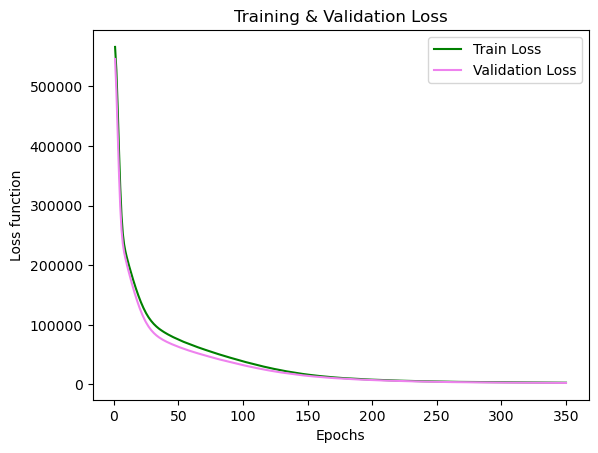

In [203]:
loss_fun = regressor_history1.history['loss']
val_loss_fun = regressor_history1.history['val_loss']
epochs = range(1,len(loss_fun)+1)

plt.plot(epochs, loss_fun, label='Train Loss', color='green')
plt.plot(epochs,val_loss_fun, label='Validation Loss', color='violet')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss function')
plt.legend()
plt.show()

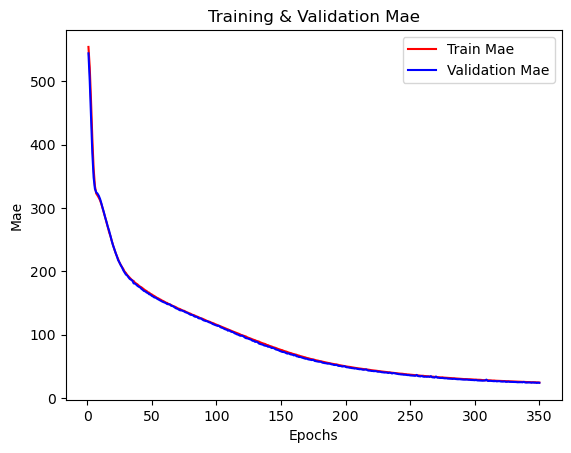

In [204]:
mae = regressor_history1.history['mae']
val_mae = regressor_history1.history['val_mae']
epochs = range(1,len(mae)+1)

plt.title('Training & Validation Mae')
plt.plot(epochs, mae, label='Train Mae', color ='red')
plt.plot(epochs, val_mae, label='Validation Mae', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Mae')
plt.legend()
plt.show()

In [205]:
results = regressor1.evaluate(X_test,y_test)

68/68 [==============================] - 0s 716us/step - loss: 2855.2642 - mae: 24.2594


In [206]:
y_test

8955     1817
10088    1719
4729      332
5731        0
3708      384
         ... 
9796      513
8969     1507
638        94
2628      216
7329      393
Name: TOTALDOLSPH, Length: 2157, dtype: int64

In [207]:
x_test_pattern = X_test[0,:]
y_pred = regressor1.predict(x_test_pattern.reshape(1,-1))
print(y_pred[0])

1/1 [==============================] - 0s 27ms/step
[1801.5353]


### MSE, MAE, R2 для всех полученных моделей.

In [208]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred1 = regressor1.predict(X_test)

mse1 = mean_squared_error(y_test, y_pred1)
mae1 = mean_absolute_error(y_test, y_pred1)
r2_1 = r2_score(y_test, y_pred1)

print(f'MSE: {mse1}')
print(f'MAE: {mae1}')
print(f'R2: {r2_1}')

68/68 [==============================] - 0s 654us/step
MSE: 2855.263806977186
MAE: 24.259357142887794
R2: 0.9881600508994753


### 2 модель

In [210]:
regressor = Sequential()
regressor.add(Dense(32, activation='relu', input_dim=X_train.shape[1]))
regressor.add(Dense(1))

In [211]:
regressor.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 32)                3872      
                                                                 
 dense_43 (Dense)            (None, 1)                 33        
                                                                 
Total params: 3905 (15.25 KB)
Trainable params: 3905 (15.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [212]:
regressor.compile(loss='mse', optimizer='adam', metrics='mae')

In [213]:
regressor_history = regressor.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=150, batch_size=32)

Epoch 1/150
216/216 [==============================] - 0s 1ms/step - loss: 554426.3750 - mae: 544.1582 - val_loss: 513298.9062 - val_mae: 516.5999
Epoch 2/150
216/216 [==============================] - 0s 1ms/step - loss: 462879.1250 - mae: 465.8220 - val_loss: 396380.9688 - val_mae: 417.8538
Epoch 3/150
216/216 [==============================] - 0s 1ms/step - loss: 345730.1562 - mae: 372.8001 - val_loss: 291326.2812 - val_mae: 344.1205
Epoch 4/150
216/216 [==============================] - 0s 1ms/step - loss: 266265.0312 - mae: 326.8446 - val_loss: 237585.0781 - val_mae: 324.8718
Epoch 5/150
216/216 [==============================] - 0s 1ms/step - loss: 231724.3281 - mae: 318.2888 - val_loss: 215548.8906 - val_mae: 321.5491
Epoch 6/150
216/216 [==============================] - 0s 1ms/step - loss: 214673.2031 - mae: 312.3936 - val_loss: 199614.8906 - val_mae: 311.8890
Epoch 7/150
216/216 [==============================] - 0s 1ms/step - loss: 200195.2969 - mae: 300.2062 - val_loss: 184

Epoch 57/150
216/216 [==============================] - 0s 1ms/step - loss: 34870.8633 - mae: 109.1698 - val_loss: 28810.4648 - val_mae: 107.1660
Epoch 58/150
216/216 [==============================] - 0s 1ms/step - loss: 33861.9570 - mae: 107.4795 - val_loss: 28000.5879 - val_mae: 106.1981
Epoch 59/150
216/216 [==============================] - 0s 1ms/step - loss: 32802.7578 - mae: 106.0985 - val_loss: 27148.6855 - val_mae: 104.7319
Epoch 60/150
216/216 [==============================] - 0s 1ms/step - loss: 31782.6582 - mae: 104.7098 - val_loss: 26304.8223 - val_mae: 102.0716
Epoch 61/150
216/216 [==============================] - 0s 1ms/step - loss: 30814.8574 - mae: 102.7530 - val_loss: 25535.6074 - val_mae: 101.2545
Epoch 62/150
216/216 [==============================] - 0s 972us/step - loss: 29850.1094 - mae: 101.3342 - val_loss: 24735.9258 - val_mae: 98.8668
Epoch 63/150
216/216 [==============================] - 0s 995us/step - loss: 28915.6445 - mae: 99.9280 - val_loss: 23980.0

Epoch 114/150
216/216 [==============================] - 0s 1ms/step - loss: 6907.8677 - mae: 45.9549 - val_loss: 6186.4414 - val_mae: 45.3621
Epoch 115/150
216/216 [==============================] - 0s 1ms/step - loss: 6769.9619 - mae: 45.3084 - val_loss: 6247.3174 - val_mae: 47.3473
Epoch 116/150
216/216 [==============================] - 0s 991us/step - loss: 6664.5576 - mae: 45.0902 - val_loss: 5924.8955 - val_mae: 43.4302
Epoch 117/150
216/216 [==============================] - 0s 1ms/step - loss: 6520.2515 - mae: 44.1951 - val_loss: 5817.5679 - val_mae: 43.2959
Epoch 118/150
216/216 [==============================] - 0s 1ms/step - loss: 6410.9419 - mae: 43.8814 - val_loss: 5739.9902 - val_mae: 42.7783
Epoch 119/150
216/216 [==============================] - 0s 1ms/step - loss: 6302.0757 - mae: 43.3900 - val_loss: 5590.5034 - val_mae: 42.0772
Epoch 120/150
216/216 [==============================] - 0s 1ms/step - loss: 6190.8062 - mae: 43.0229 - val_loss: 5604.4849 - val_mae: 43.84

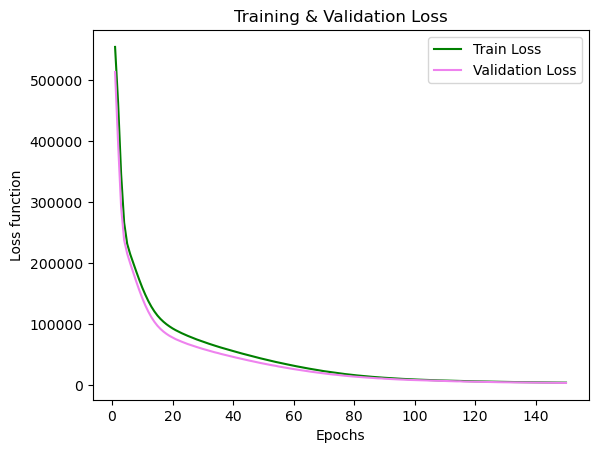

In [214]:
loss_fun = regressor_history.history['loss']
val_loss_fun = regressor_history.history['val_loss']
epochs = range(1,len(loss_fun)+1)

plt.plot(epochs, loss_fun, label='Train Loss', color='green')
plt.plot(epochs,val_loss_fun, label='Validation Loss', color='violet')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss function')
plt.legend()
plt.show()

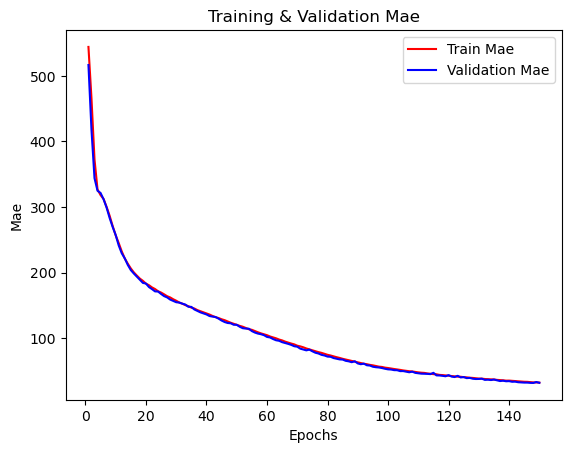

In [215]:
mae = regressor_history.history['mae']
val_mae = regressor_history.history['val_mae']
epochs = range(1,len(mae)+1)

plt.title('Training & Validation Mae')
plt.plot(epochs, mae, label='Train Mae', color ='red')
plt.plot(epochs, val_mae, label='Validation Mae', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Mae')
plt.legend()
plt.show()

In [216]:
results = regressor.evaluate(X_test,y_test)

68/68 [==============================] - 0s 792us/step - loss: 3530.1638 - mae: 32.2406


In [217]:
x_test_pattern = X_test[2,:]
y_pred = regressor.predict(x_test_pattern.reshape(1,-1))
print(y_pred[0])

1/1 [==============================] - 0s 27ms/step
[342.37906]


In [218]:
y_pred = regressor.predict(X_test)

mse2 = mean_squared_error(y_test, y_pred)
mae2 = mean_absolute_error(y_test, y_pred)
r2_2 = r2_score(y_test, y_pred)

print(f'MSE: {mse2}')
print(f'MAE: {mae2}')
print(f'R2: {r2_2}')

68/68 [==============================] - 0s 657us/step
MSE: 3530.163792155001
MAE: 32.24060708394911
R2: 0.9853614368264346


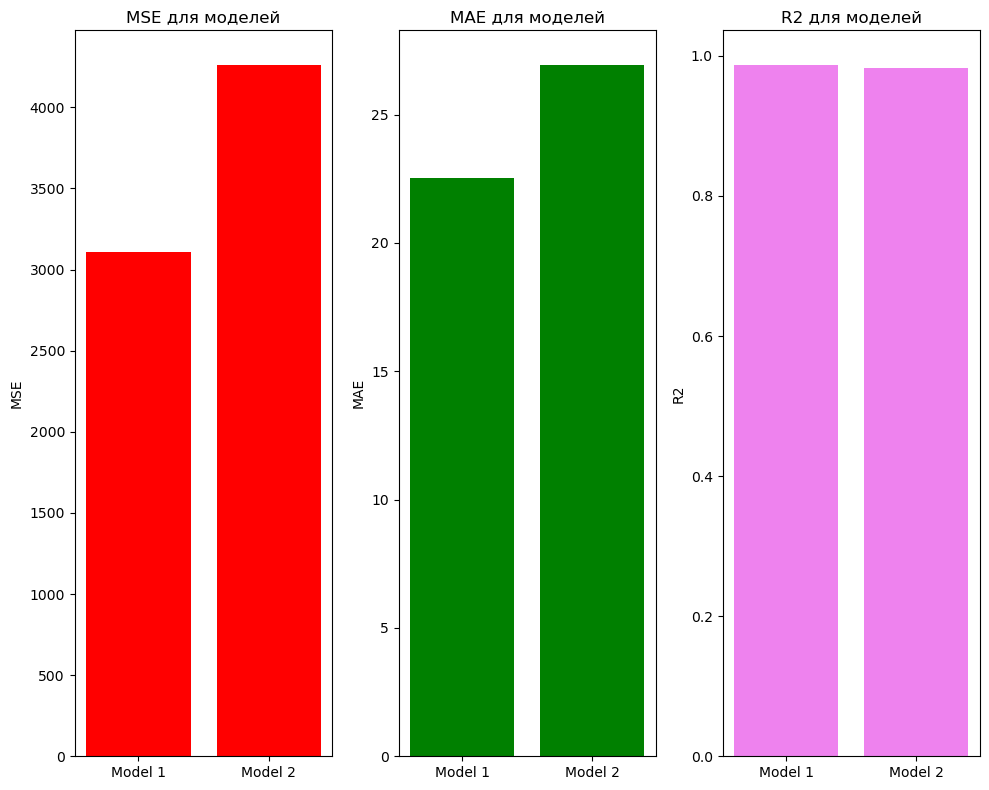

In [239]:
models = ['Model 1', 'Model 2']

mse_val = [mse1, mse2]
mae_val = [mae1, mae2]
r2_val = [r2_1, r2_2]
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10,8))

# Диаграмма MSE для всех рассмотренных моделей
axes[0].bar(models, mse_val, color='red')
axes[0].set_ylabel('MSE')
axes[0].set_title('MSE для моделей')

# Диаграмма MAE для всех рассмотренных моделей
axes[1].bar(models, mae_val,color='green')
axes[1].set_ylabel('MAE')
axes[1].set_title('MAE для моделей')

# Диаграмма R2 для всех рассмотренных моделей
axes[2].bar(models, r2_val,color='violet')
axes[2].set_ylabel('R2')
axes[2].set_title('R2 для моделей')

plt.tight_layout()
plt.show()

### Вывод

Чем ниже <b>MSE</b>, тем лучше модель соответствует набору данных. Следовательно, точность прогнозирования первой модели лучше.

Чем ниже <b>MAE</b>, тем лучше модель соответствует набору данных, поэтому Model 1 лучше прогнозирует.

На диаграмме видно, что значения R2 обеих моделей высокие.

In [223]:
result_r2 = pd.DataFrame({
    'Models':['Model 1', 'Model 2'],
    'R2': [r2_1, r2_2]
})
print(result_r2)

    Models        R2
0  Model 1  0.988160
1  Model 2  0.985361


Значение <b>R2</b> первой модели превосходит, поэтому Model 1 более эффективно использовать для прогнозирования данных.